In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

In [2]:
def make_data(N, f = 0.3, rseed = 1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

In [3]:
x = make_data(20)
x_d = np.linspace(-4, 8, 1000)

In [4]:
from sklearn.neighbors import KernelDensity

#instantiate and fit the KDE model
kde = KernelDensity(bandwidth = 1.0, kernel = 'gaussian')
kde.fit(x[:, None])

#score samples return the log of the probability density
logprob = kde.score_samples(x_d[:, None])

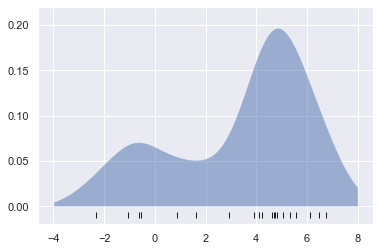

In [5]:
plt.fill_between(x_d, np.exp(logprob), alpha = 0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth = 1)
plt.ylim(-0.02, 0.22);

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel = 'gaussian'), dict(bandwidth = bandwidths), cv = LeaveOneOut())
grid.fit(x[:, None])

GridSearchCV(cv=LeaveOneOut(), estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.27825594,  0.29150531,  0.305385...
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47707636,
        2.59502421,  2.71858824,  2.84803587,  2.98364724,  3.12571585,
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])})

In [7]:
grid.best_params_

{'bandwidth': 1.1233240329780276}

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth: float
        the kernel bandwidth within each class
    kernel: str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth = 1.0, kernel = 'gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth = self.bandwidth, kernel = self.kernel).fit(Xi) for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0]) for Xi in training_sets]
        
        return self
    
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X) for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        
        return result / result.sum(1, keepdims = True)
    
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [21]:
from sklearn.datasets import load_digits

digits = load_digits()

bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths})
grid.fit(digits.data, digits.target)

GridSearchCV(estimator=KDEClassifier(),
             param_grid={'bandwidth': array([  1.        ,   1.04761575,   1.09749877,   1.149757  ,
         1.20450354,   1.26185688,   1.32194115,   1.38488637,
         1.45082878,   1.51991108,   1.59228279,   1.66810054,
         1.7475284 ,   1.83073828,   1.91791026,   2.009233  ,
         2.10490414,   2.20513074,   2.3101297 ,   2.42012826,
         2.53536449,   2.65608778,   2.7825594 ,   2.91505306,
         3.05385551,   3.19926714,   3.3516026...
        23.64489413,  24.77076356,  25.95024211,  27.18588243,
        28.48035868,  29.8364724 ,  31.2571585 ,  32.74549163,
        34.30469286,  35.93813664,  37.64935807,  39.44206059,
        41.320124  ,  43.28761281,  45.34878508,  47.50810162,
        49.77023564,  52.14008288,  54.62277218,  57.22367659,
        59.94842503,  62.80291442,  65.79332247,  68.92612104,
        72.20809018,  75.64633276,  79.24828984,  83.02175681,
        86.97490026,  91.11627561,  95.45484567, 100.

In [56]:
scores = grid.cv_results_['mean_test_score']

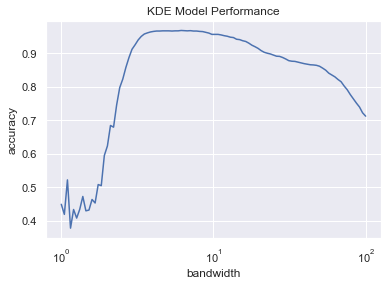

In [57]:
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance');

In [61]:
print(grid.best_params_)
print(f'accuracy = {grid.best_score_}')

{'bandwidth': 6.135907273413174}
accuracy = 0.9677298050139276


In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

cross_val_score(GaussianNB(), digits.data, digits.target).mean()

0.8069281956050759

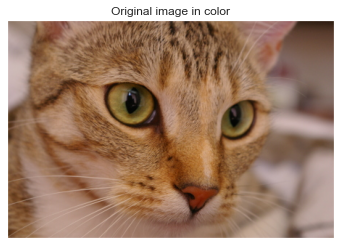

In [68]:
fig, ax = plt.subplots(subplot_kw = dict(xticks = [], yticks = []))

ax.imshow(data.chelsea())
ax.set(title = 'Original image in color');

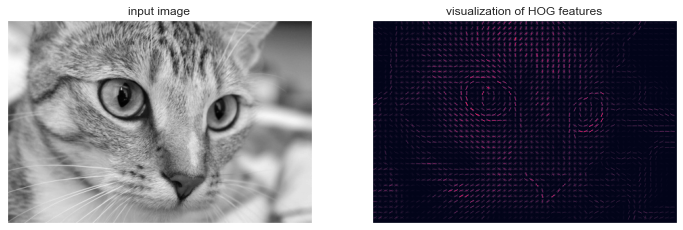

In [65]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualize = True)

fig, ax = plt.subplots(1, 2, figsize = (12, 6), subplot_kw = dict(xticks = [], yticks = []))

ax[0].imshow(image, cmap = 'gray')
ax[0].set(title = 'input image')

ax[1].imshow(hog_vis)
ax[1].set(title = 'visualization of HOG features');

In [69]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

(13233, 62, 47)

In [70]:
from skimage import transform

imgs_to_use = ['camera', 'text', 'coins', 'moon', 'page', 'clock', 'immunohistochemistry', 'chelsea', 'coffee', 
               'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]

<ipython-input-70-4b39390c2496>:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]


In [72]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale = 1.0, patch_size = positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size = extracted_patch_size, max_patches = N, random_state = 0)
    patches = extractor.transform(img[np.newaxis])
    
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size) for patch in patches])
        
    return patches

In [74]:
negative_patches = np.vstack([extract_patches(im, 1000, scale) for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 62, 47)

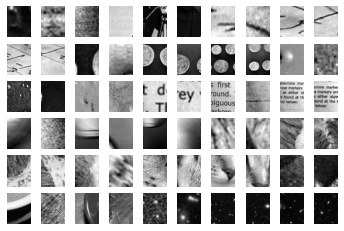

In [76]:
fig, ax = plt.subplots(6, 10)

for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap = 'gray')
    axi.axis('off')

In [79]:
from itertools import chain

X_train = np.array([feature.hog(im) for im in chain(positive_patches, negative_patches)])

y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [80]:
X_train.shape

(43233, 1215)

In [81]:
cross_val_score(GaussianNB(), X_train, y_train)

array([0.94772754, 0.97189777, 0.97236036, 0.97490169, 0.97374508])

In [82]:
from sklearn.svm import LinearSVC

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

C:\Users\U\anaconda3\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\U\anaconda3\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\U\anaconda3\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\U\anaconda3\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\U\anaconda3\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\U\anaconda3\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

0.9884809818126495

In [83]:
grid.best_params_

{'C': 1.0}

In [84]:
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC()

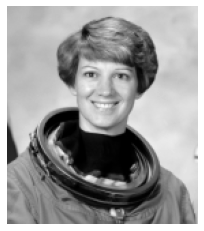

In [91]:
test_image = color.rgb2gray(data.astronaut())
test_image = transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]

plt.imshow(test_image, cmap = 'gray')
plt.axis('off');

In [92]:
def sliding_window(img, patch_size = positive_patches[0].shape, istep = 2, jstep = 2, scale = 1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i: i + Ni, j: j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
                
            yield (i, j), patch

In [94]:
indices, patches = zip(*sliding_window(test_image))

patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

(1911, 1215)

In [95]:
labels = model.predict(patches_hog)
labels.sum()

49.0

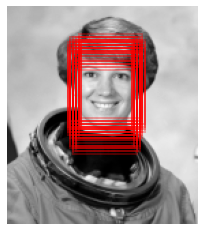

In [96]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap = 'gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor = 'red', alpha = 0.3, lw = 2, facecolor = 'none'))